In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np

Average density = 1010.39 ± 6.29 K


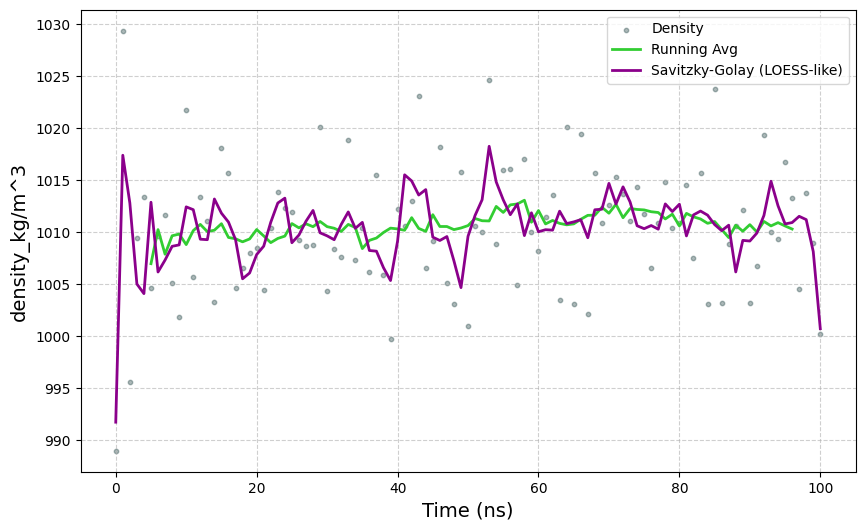

In [10]:
fname = "/Users/samirabaghbanbari/samira/code/data/density.xvg"

#to extract the time and density columns
time = []
density = []

with open(fname, "r") as fyle:
    for line in fyle:
        if line.startswith(("#", "@")):
            continue
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                t = float(parts[0])
                d = float(parts[1])
                time.append(t)
                density.append(d)
            except ValueError:
                continue
        
df = pd.DataFrame({"Time_ps": time, "density_kg/m^3": density})
# running average (moving window of e.g. 10 points)
window_size = 10
df["RunningAvg"] = df["density_kg/m^3"].rolling(window=window_size, center=True).mean()
# mean and std deviation
mean_density = df["density_kg/m^3"].mean()
std_density = df["density_kg/m^3"].std()
print(f"Average density = {mean_density:.2f} ± {std_density:.2f} K")
# apply LOESS fit 
x = df["Time_ps"].values
y = df["density_kg/m^3"].values

# plt.figure(figsize=(10, 6))
# plt.plot(df["Time_ps"], df["density_kg/m^3"], label="density", color = "blue")
# plt.xlabel("Time_ps", fontsize=12)
# plt.ylabel("density_kg/m^3", fontsize=14)
# plt.legend()
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
     

# Savitzky-Golay smoothing (like LOESS, local polynomial fit)
polyorder = 5
y_savgol = savgol_filter(y, window_size, polyorder)

plt.figure(figsize=(10, 6))
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("density_kg/m^3", fontsize=14)
plt.scatter(x, y, color="darkslategrey", s=10, alpha=0.4, label="Density")
plt.plot(x, df["RunningAvg"], color="limegreen", linewidth=2, label="Running Avg")
plt.plot(x, y_savgol, color="darkmagenta", linewidth=2, label="Savitzky-Golay (LOESS-like)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
# plt.savefig("Temperature_vs_time.pdf", dpi=400)